<img src="tpan1.PNG">

###### Réaliser par : 
#### *** ibtissem BOUZIDI 2 DNI 1 ***


<h2> <span style="color:red">Introduction</span></h2>
><B>C</B>lustering is a Machine Learning technique and it can be used also in data mining  that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields ( AI,ML,DATA MINING ,...) </br> 

<i><B>I</B>n our case Study , we will apply clustering on Images using k-means Algorithm  then we will add a noise to image and reapply k-means Algorithm then filtring noise and use k-mean algorithm on the image After filtring  
    <B>l</B>ibraries used : <B><span style="color:#0000C0"> Sklearn and Open Cv </span> </B> </i>


### <span style="color:orange"><strong>Step 1 : </strong></span><i>Application of K-means on  an Image ( Image Segmentation): </i>

In [5]:
#pip install opencv-python

In [1]:
from sklearn.cluster import KMeans
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

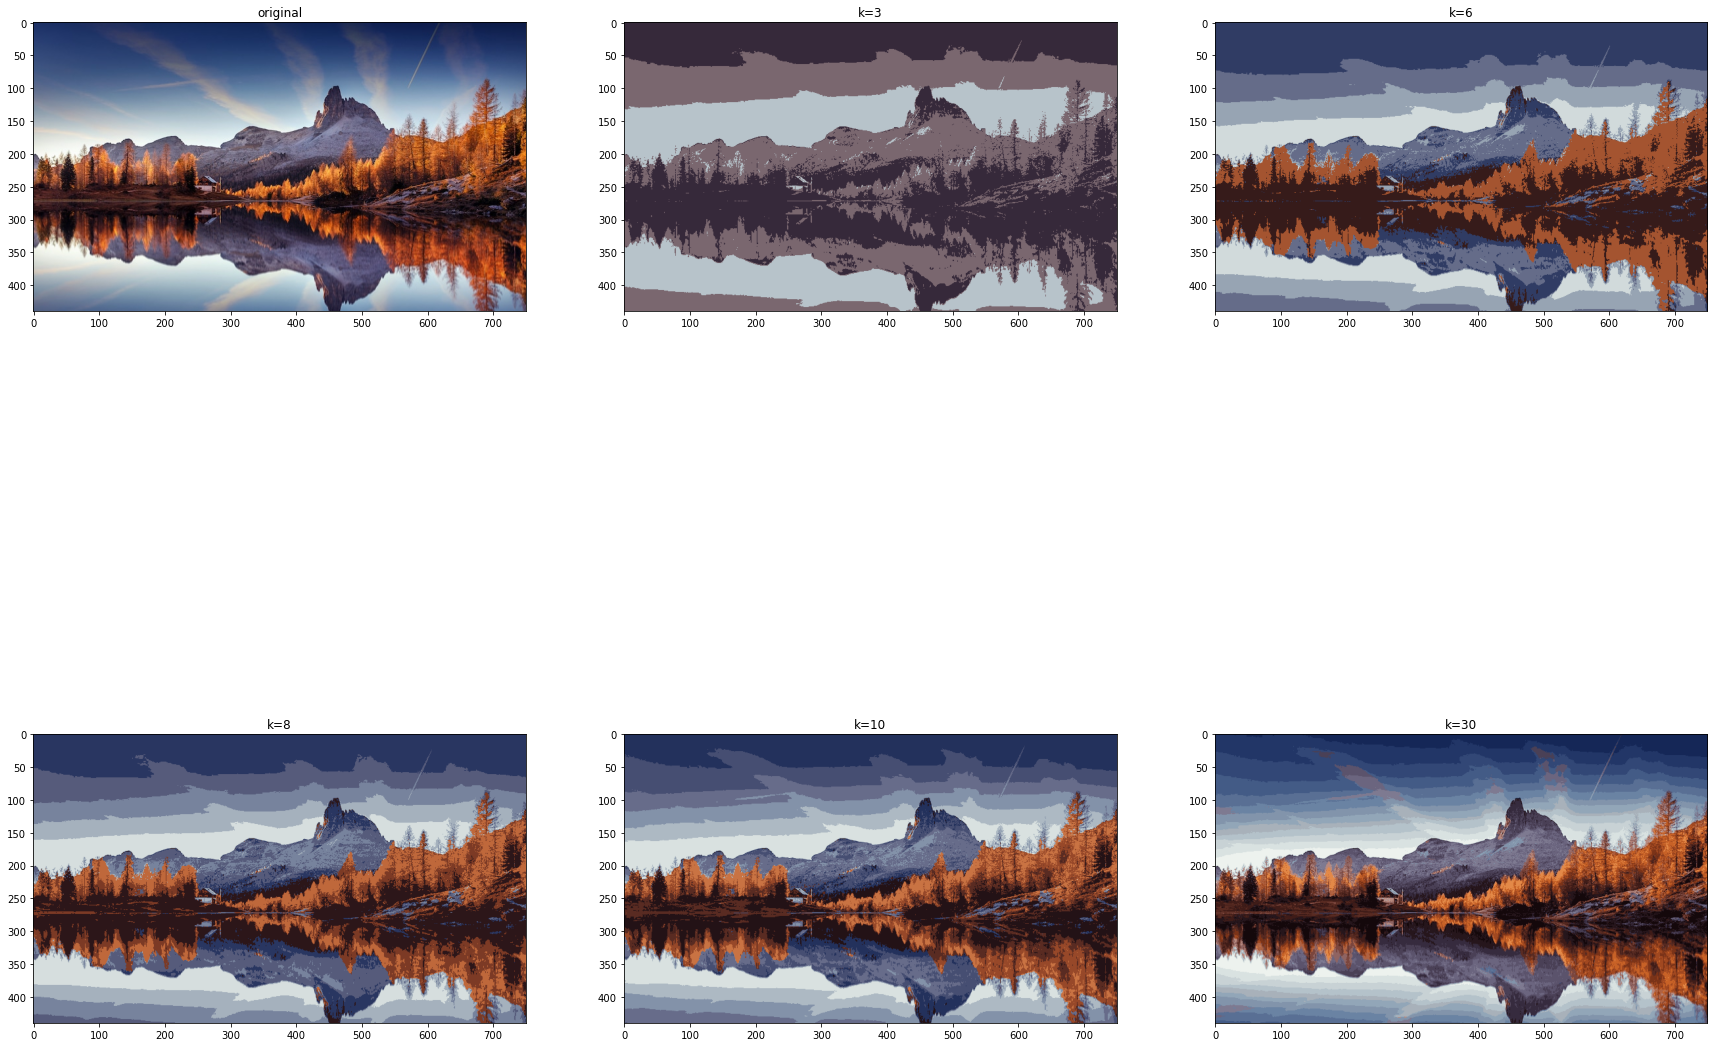

In [2]:
original_img = cv2.imread('nature.jpg')
img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res = center[label.flatten()]
out1 = res.reshape((img.shape))
K =6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res1 = center[label.flatten()]
out2 = res1.reshape((img.shape))
K = 8
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res2 = center[label.flatten()]
out3 = res2.reshape((img.shape))
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res3 = center[label.flatten()]
out4 = res3.reshape((img.shape))
K = 30
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res4 = center[label.flatten()]
out5 = res4.reshape((img.shape))
output = [img , out1, out2 , out3 ,out4 ,out5]
titles = ['original','k=3' , 'k=6' , 'k=8', 'k=10','k=30']

plt.figure(figsize=(30,24))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(output[i].astype('uint8'))
    plt.title(titles[i])
plt.show()



<B> <span style="color:Black">Let's Analyse the effect of number se cluster </span></B>


<div class="alert alert-block alert-danger">
    <strong>every time when we increase the number of clusters , a new level of color appears  and the segmented image will be more and more similary to the original image   </strong></div>
  

<B> <span style="color:#0000C0">How to Determine the Optimal K for K-Means</span></B>


 There are two methods that can be useful to find this mysterious k in k-Means.
These methods are:
<ol>
    <li><B> The Elbow Method</B></li>
    <li><B>The Silhouette Method</B></li>
</ol>

### <span style="color:orange"><strong>Step 2 : </strong></span><i>Add Noise to image: </i>

>In this step, try some types of noise on the original image

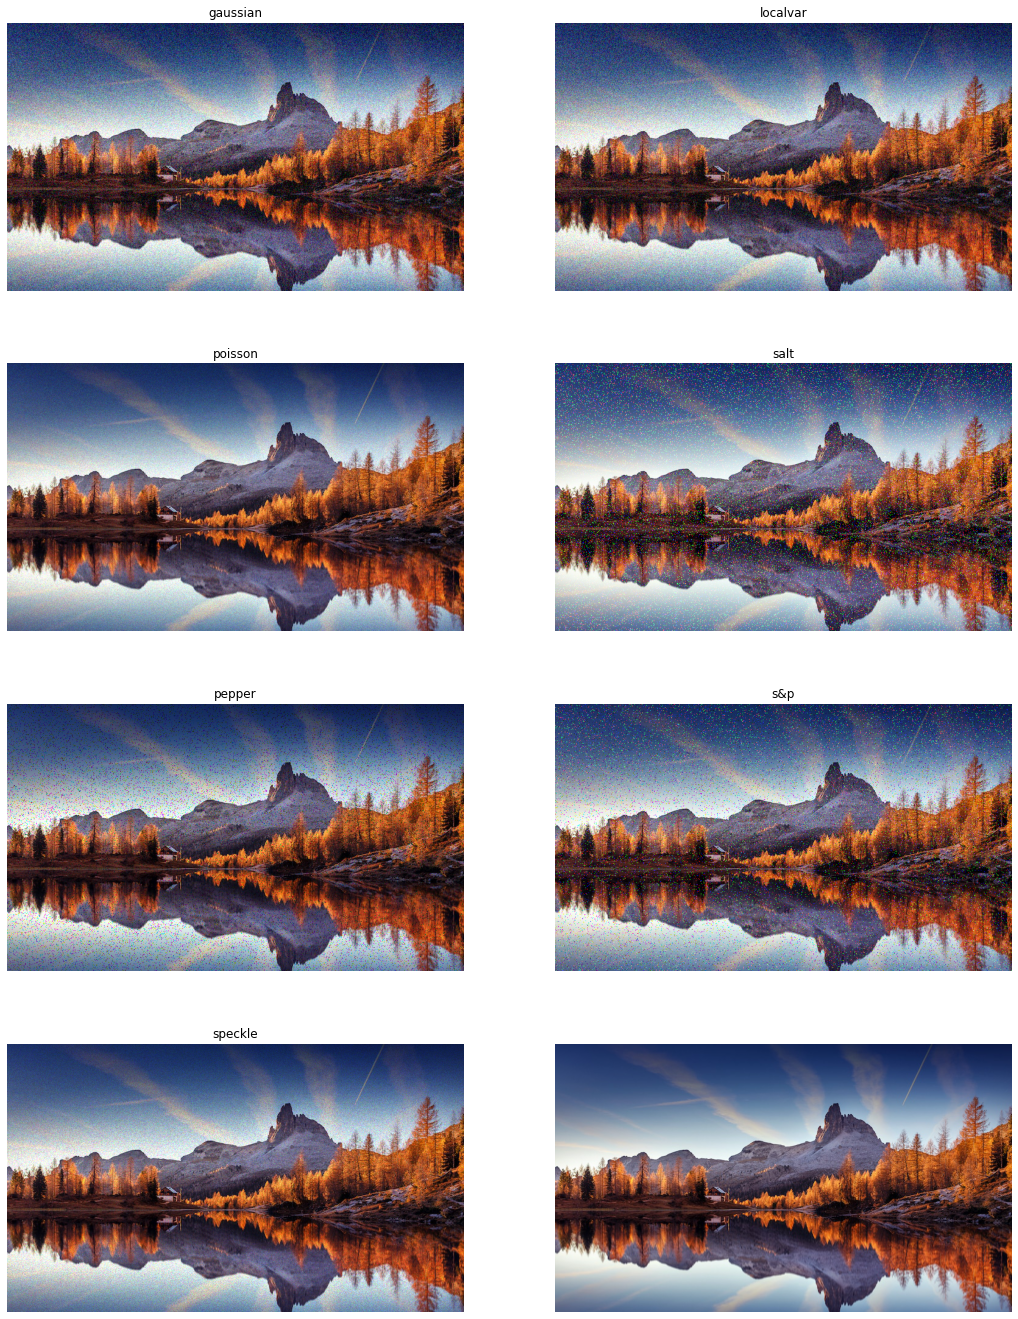

In [17]:
import skimage.io
import matplotlib.pyplot as plt
img_path="eleph.jpg"
img = skimage.io.imread('nature.jpg')/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


<div class="alert alert-block alert-danger"> now we choose a noisy image (pepper image) and we apply some methods of denoising    to reduce noise </div>

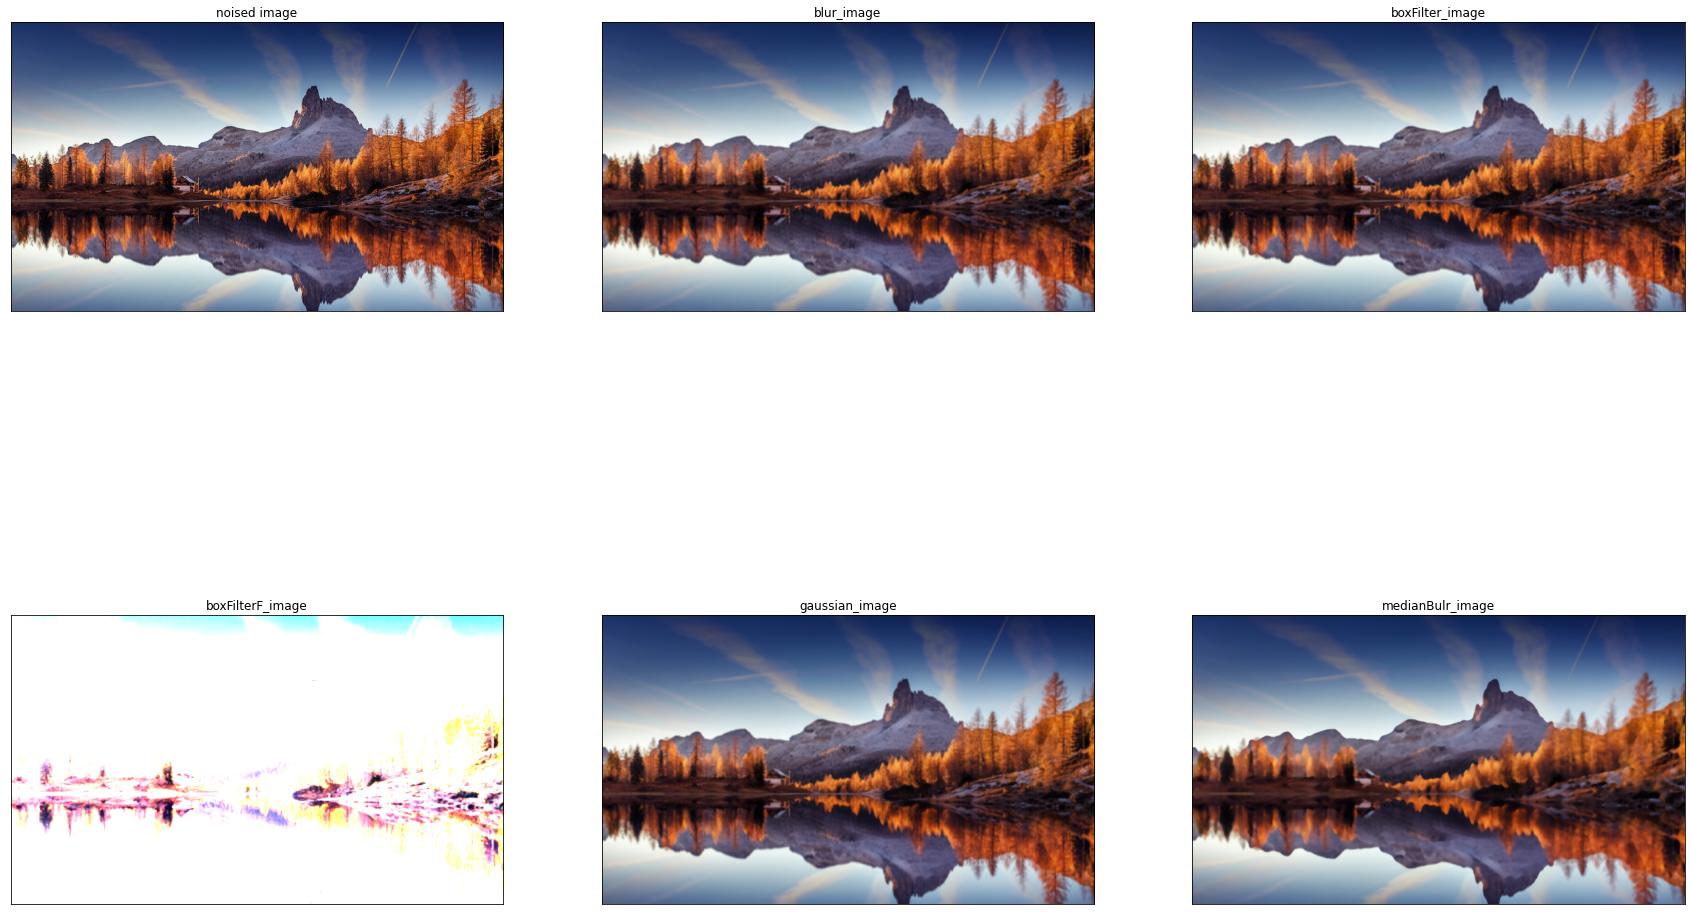

In [18]:
import cv2 as cv
from matplotlib import pyplot as plt
 
def blur_demo(image):
    blur = cv.blur(image,(3,3))
    return blur
 
def boxFilter_demo(image):
    boxFilter = cv.boxFilter(image,-1,(3,3),normalize=True)
    return boxFilter
 
def boxFilterF_demo(image):
    boxFilterF = cv.boxFilter(image,-1,(3,3),normalize=False)
    return boxFilterF
 
def Gaussian_demo(image):
    gaussian = cv.GaussianBlur(image,(5,5),1)
    return gaussian
 
def medianBulr(image):
    medianbulr = cv.medianBlur(image,5)
    return medianbulr
 
src = cv.imread("nature.jpg")
src = src[:,:,[2,1,0]]
img1 = blur_demo(src)
img2 = boxFilter_demo(src)
img3 = boxFilterF_demo(src)
img4 = Gaussian_demo(src)
img5 = medianBulr(src)
plt.figure(figsize=(30,20))

 
plt.subplot(2,3,1),plt.imshow(src)
plt.title("noised image"),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(img1)
plt.title("blur_image"),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(img2)
plt.title("boxFilter_image"),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(img3)
plt.title("boxFilterF_image"),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(img4)
plt.title("gaussian_image"),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img5)
plt.title("medianBulr_image"),plt.xticks([]),plt.yticks([])
plt.show()

### <span style="color:orange"><strong>Step 3 : </strong></span><i>Reapply K-means on denoising  image: </i>

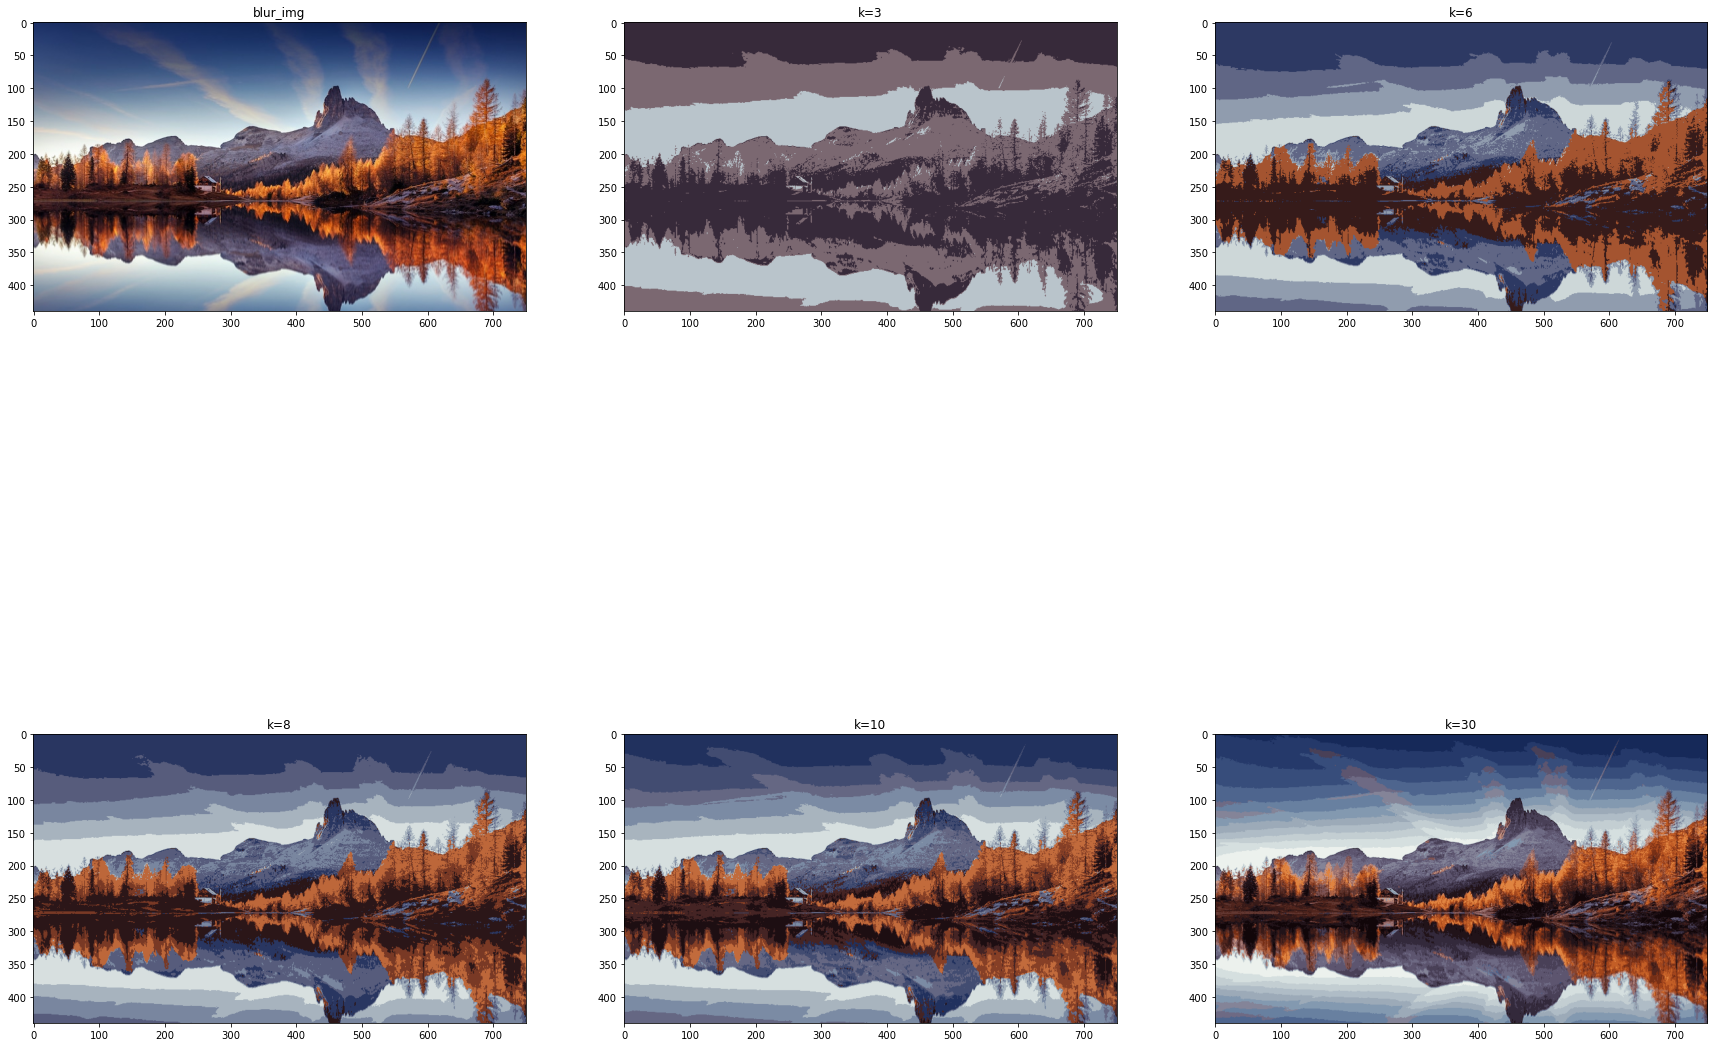

In [19]:
from sklearn.cluster import KMeans
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


original_img = cv2.imread('nature.jpg')
img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res = center[label.flatten()]
out1 = res.reshape((img.shape))
K =6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res1 = center[label.flatten()]
out2 = res1.reshape((img.shape))
K = 8
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res2 = center[label.flatten()]
out3 = res2.reshape((img.shape))
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res3 = center[label.flatten()]
out4 = res3.reshape((img.shape))
K = 30
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
res4 = center[label.flatten()]
out5 = res4.reshape((img.shape))
output = [img , out1, out2 , out3 ,out4 ,out5]
titles = ['blur_img','k=3' , 'k=6' , 'k=8', 'k=10','k=30']

plt.figure(figsize=(30,24))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(output[i].astype('uint8'))
    plt.title(titles[i])
plt.show()



><B> <span style="color:black">Let's make comparaison between result of K-means on original image and K-mean on denonsing image </span></B> 


(<AxesSubplot:title={'center':'segmentation on blur_image with k=6'}>,
 Text(0.5, 1.0, 'segmentation on blur_image with k=6'))

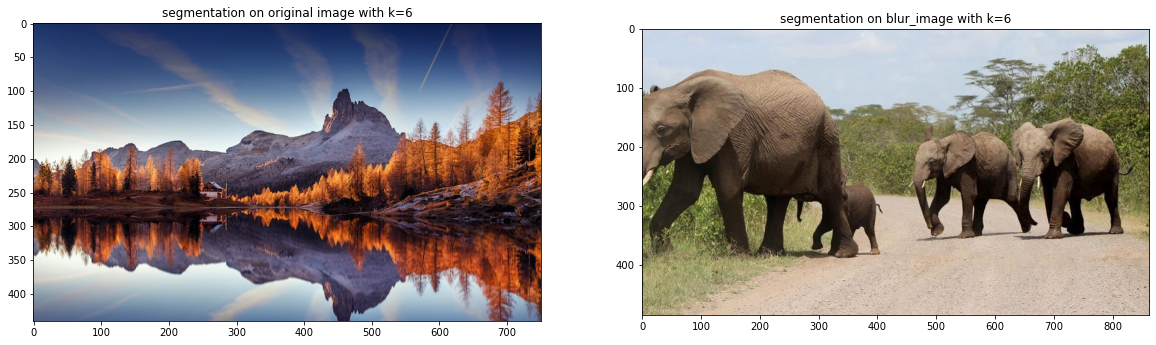

In [20]:
import skimage.io
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('nature.JPG')
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
image1 = cv2.imread('eleph.JPG')
img1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
plt.figure(figsize=(20,10))

plt.subplot(1,2,1),plt.imshow(img),plt.title('segmentation on original image with k=6')
plt.subplot(1,2,2),plt.imshow(img1),plt.title('segmentation on blur_image with k=6')

 <div class="alert alert-block alert-danger">
  <strong>we note that K-means with K=6 is more clear on original image than the denoising image (blur_image) </strong> 
    </div>
  

<h2> <span style="color:Red">Conclusion</span></h2>



>Image segmentation is the problem of dividing an image into salient regions (pixels) or “distinguished things”  as a goal to do compression for transmission or to dectect forms . <br/>
In this manipulation , we aim to khow the effects of k value on image segmentation and how the denosing can affect the quality of segmented image 



In [12]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [13]:
%load_ext watermark

In [14]:
%watermark -v -m -p  pandas,numpy,plt,cv2,skimage,kmeans

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas : 1.2.4
numpy  : 1.20.1
plt    : not installed
cv2    : 4.5.4-dev
skimage: 0.18.3
kmeans : not installed

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

